In [1]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder as SafeImageFolder
import os
import warnings
from PIL import Image, UnidentifiedImageError
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from PIL import UnidentifiedImageError
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [2]:
class SafeImageFolder(ImageFolder):
    def __getitem__(self, index):
        try:
            return super().__getitem__(index)
        except (UnidentifiedImageError, OSError, ValueError) as e:
            warnings.warn(f" Skipping broken image at index {index}: {e}")
            # Probeer volgende afbeelding (veilig modulo om niet uit de lijst te gaan)
            return self.__getitem__((index + 1) % len(self))

In [ ]:
# Transform images to tensors and resize them to a fixed size
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize all images to the same size
    transforms.ToTensor(),           # Convert images to tensors
])

# Load the dataset using ImageFolder (subfolder = label)
dataset = SafeImageFolder(root='Incidents-subset', transform=transform)
class_names = dataset.classes
num_classes = len(class_names)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Visualize Dataset

Total images: 7308
Training dataset size: 5846
Test dataset size: 1462

Number of classes in the dataset: 12
Classes in the dataset:  ['airplane accident', 'bicycle accident', 'car accident', 'collapsed', 'earthquake', 'flooded', 'ice storm', 'nuclear explosion', 'oil spill', 'tornado', 'volcanic eruption', 'wildfire']
Index of each class:  {'airplane accident': 0, 'bicycle accident': 1, 'car accident': 2, 'collapsed': 3, 'earthquake': 4, 'flooded': 5, 'ice storm': 6, 'nuclear explosion': 7, 'oil spill': 8, 'tornado': 9, 'volcanic eruption': 10, 'wildfire': 11}

Number of images for each label:
Label 0: 874 images
Label 1: 228 images
Label 2: 966 images
Label 3: 631 images
Label 4: 925 images
Label 5: 958 images
Label 6: 615 images
Label 7: 231 images
Label 8: 294 images
Label 9: 281 images
Label 10: 628 images
Label 11: 677 images

First image in the dataset:
Image shape: torch.Size([3, 224, 224])
Label: 0
Label name: airplane accident


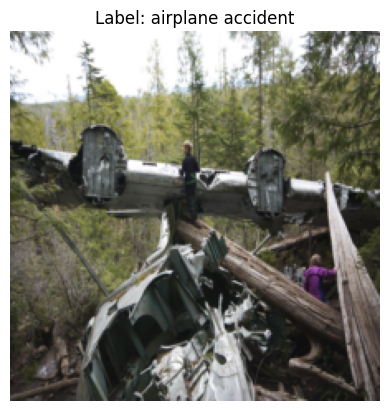

In [4]:
# print the number of images in the training and test sets
print(f"Total images: {len(dataset)}")
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}\n")

# print the classes in the dataset
print(f"Number of classes in the dataset: {len(dataset.classes)}")
print(f"Classes in the dataset:  {dataset.classes}")
print(f"Index of each class:  {dataset.class_to_idx}\n")

# Show how many images for each label
from collections import Counter

# Count the number of images for each label in dataset
counter = Counter(dataset.targets)
print("Number of images for each label:")
for label, count in counter.items():
    print(f"Label {label}: {count} images")


# Print the shape of an first image in the dataset add also the label
print("\nFirst image in the dataset:")
image, label = dataset[0]
print(f"Image shape: {image.shape}")
print(f"Label: {label}")
print(f"Label name: {dataset.classes[label]}")

# Display the image
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Label: {dataset.classes[label]}")
plt.axis('off')
plt.show()





C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12244\1419864693.py:6: UserWarning:  Skipping broken image at index 25: cannot identify image file <_io.BufferedReader name='Incidents-subset\\airplane accident\\.hashed.6f95947e.desktop.story.share.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12244\1419864693.py:6: UserWarning:  Skipping broken image at index 358: cannot identify image file <_io.BufferedReader name='Incidents-subset\\airplane accident\\AR-190939882.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12244\1419864693.py:6: UserWarning:  Skipping broken image at index 2728: cannot identify image file <_io.BufferedReader name='Incidents-subset\\earthquake\\.hashed.909e0e37.desktop.story.share.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_12244\1419864693.py:6: Use

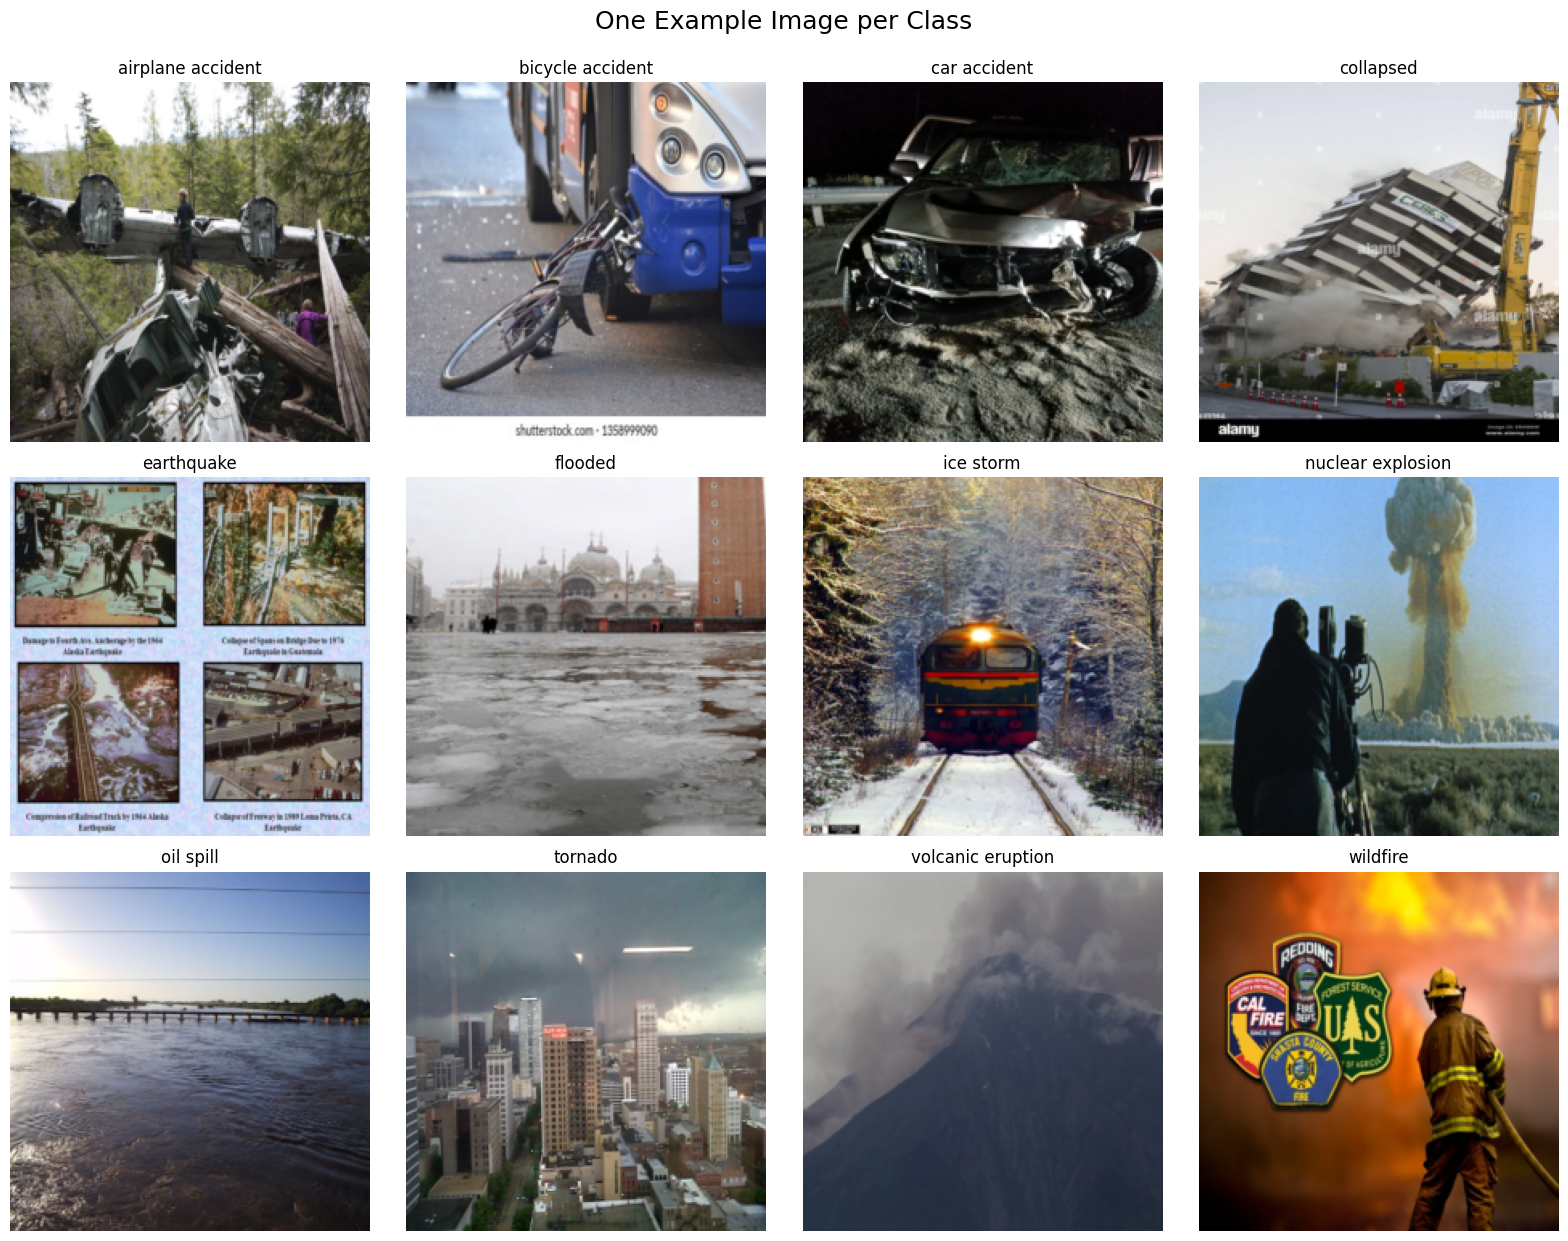

In [5]:
# Show one image per class in the dataset

# Collect one image per class
example_images = {}

for image, label in dataset:
    class_name = dataset.classes[label]
    if class_name not in example_images:
        example_images[class_name] = image
    if len(example_images) == len(dataset.classes):
        break

# Plot settings
num_classes = len(example_images)
cols = 4
rows = (num_classes + cols - 1) // cols

plt.figure(figsize=(cols * 4, rows * 4))

for i, (class_name, image) in enumerate(example_images.items()):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.suptitle("One Example Image per Class", fontsize=18, y=1.03)
plt.show()



# Evaluation Function

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, class_names=None, model_name="Model"):
    print(f"\nEvaluation Results for {model_name}:")
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))
    
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# BASELINE MODEL (RANDOM FOREST)

Feature extraction with ResNet18 (without last layer)

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_46208\1419864693.py:6: UserWarning:  Skipping broken image at index 25: cannot identify image file <_io.BufferedReader name='Incidents-subset\\airplane accident\\.hashed.6f95947e.desktop.story.share.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_46208\1419864693.py:6: UserWarning:  Skipping broken image at index 358: cannot identify image file <_io.BufferedReader name='Incidents-subset\\airplane accident\\AR-190939882.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_46208\1419864693.py:6: UserWarning:  Skipping broken image at index 2728: cannot identify image file <_io.BufferedReader name='Incidents-subset\\earthquake\\.hashed.909e0e37.desktop.story.share.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_46208\1419864693.py:6: Use

Running Stratified 5-Fold Cross-Validation with Random Forest (color histograms)...

Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 5

Evaluation Results for Random Forest (5-Fold Avg.):

Accuracy: 0.3618

Classification Report:
                   precision    recall  f1-score   support

airplane accident       0.31      0.32      0.32       874
 bicycle accident       0.27      0.02      0.03       228
     car accident       0.35      0.55      0.43       966
        collapsed       0.22      0.10      0.13       631
       earthquake       0.32      0.46      0.38       925
          flooded       0.29      0.37      0.33       958
        ice storm       0.41      0.53      0.46       615
nuclear explosion       0.40      0.06      0.11       231
        oil spill       0.41      0.02      0.05       294
          tornado       0.40      0.08      0.13       281
volcanic eruption       0.43      0.36      0.39       628
         wildfire    

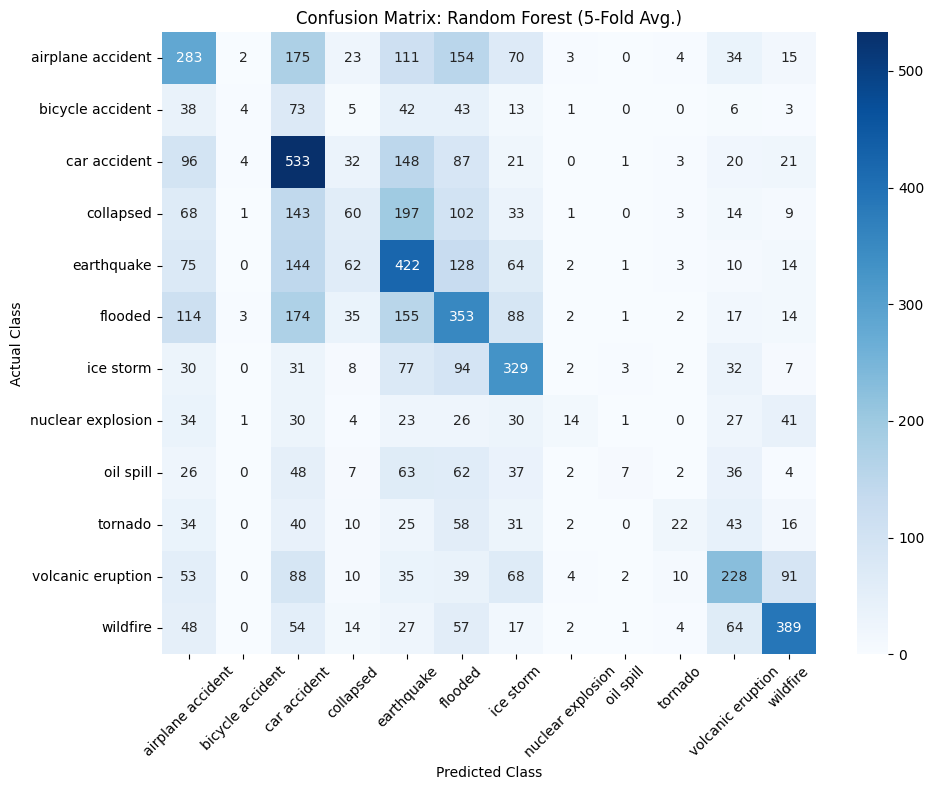

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Function to extract color histogram from a single image tensor
def extract_color_histogram_from_tensor(img_tensor, bins=16):
    img_np = img_tensor.permute(1, 2, 0).numpy()  # CHW to HWC format
    hist_r, _ = np.histogram(img_np[:, :, 0], bins=bins, range=(0, 1), density=True)
    hist_g, _ = np.histogram(img_np[:, :, 1], bins=bins, range=(0, 1), density=True)
    hist_b, _ = np.histogram(img_np[:, :, 2], bins=bins, range=(0, 1), density=True)
    return np.concatenate([hist_r, hist_g, hist_b])

# Extract features and labels from the dataset
X_all, y_all = [], []
for img, label in dataset:
    feature = extract_color_histogram_from_tensor(img, bins=16)
    X_all.append(feature)
    y_all.append(label)

X_all = np.array(X_all)
y_all = np.array(y_all)

# Stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store all true and predicted labels from each fold
all_y_true = []
all_y_pred = []

print("Running Stratified 5-Fold Cross-Validation with Random Forest (color histograms)...\n")

for fold, (train_idx, test_idx) in enumerate(skf.split(X_all, y_all)):
    print(f"Processing Fold {fold + 1}")

    # Split data for this fold
    X_train, X_test = X_all[train_idx], X_all[test_idx]
    y_train, y_test = y_all[train_idx], y_all[test_idx]

    # Train Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test)

    # Store predictions for overall evaluation
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

# Evaluate averaged results across all folds
evaluate_model(all_y_true, all_y_pred, class_names=class_names, model_name="Random Forest")



# RESNET18 MODEL

In [ ]:
from sklearn.model_selection import StratifiedKFold
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import numpy as np

# Prepare data (images and labels from dataset)
X_all = [img for img, label in dataset]
y_all = [label for img, label in dataset]
y_all = np.array(y_all)

# Stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store predictions and labels from all folds
all_y_true = []
all_y_pred = []

print("Starting Stratified 5-Fold Cross-Validation for ResNet18...")

for fold, (train_idx, test_idx) in enumerate(skf.split(X_all, y_all)):
    print(f"Fold {fold + 1}")

    # Prepare DataLoaders for this fold
    train_subset = torch.utils.data.Subset(dataset, train_idx)
    test_subset = torch.utils.data.Subset(dataset, test_idx)

    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_subset, batch_size=32, shuffle=False)

    # Load pretrained ResNet18
    model = models.resnet18(pretrained=True)

    # Freeze feature extractor layers
    for param in model.parameters():
        param.requires_grad = False

    # Replace classifier head
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
    epochs = 5

    # Training loop
    model.train()
    for epoch in range(epochs):
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

    # Evaluation
    model.eval()
    y_true_fold, y_pred_fold = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true_fold.extend(labels.numpy())
            y_pred_fold.extend(preds.cpu().numpy())

    # Accumulate predictions
    all_y_true.extend(y_true_fold)
    all_y_pred.extend(y_pred_fold)

# Evaluate overall averaged results
print("\nFinal Evaluation for ResNet18 (5-Fold Average):")
evaluate_model(all_y_true, all_y_pred, class_names=class_names, model_name="ResNet18")


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_46208\1419864693.py:6: UserWarning:  Skipping broken image at index 25: cannot identify image file <_io.BufferedReader name='Incidents-subset\\airplane accident\\.hashed.6f95947e.desktop.story.share.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_46208\1419864693.py:6: UserWarning:  Skipping broken image at index 358: cannot identify image file <_io.BufferedReader name='Incidents-subset\\airplane accident\\AR-190939882.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_46208\1419864693.py:6: UserWarning:  Skipping broken image at index 2728: cannot identify image file <_io.BufferedReader name='Incidents-subset\\earthquake\\.hashed.909e0e37.desktop.story.share.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_46208\1419864693.py:6: Use

# EfficientNet B0 Classifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import numpy as np

# Prepare data (images and labels from dataset)
X_all = [img for img, label in dataset]
y_all = [label for img, label in dataset]
y_all = np.array(y_all)

# Stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store predictions and labels from all folds
all_y_true = []
all_y_pred = []

print("Starting Stratified 5-Fold Cross-Validation for EfficientNet-B0...")

for fold, (train_idx, test_idx) in enumerate(skf.split(X_all, y_all)):
    print(f"Fold {fold + 1}")

    # Prepare DataLoaders for this fold
    train_subset = torch.utils.data.Subset(dataset, train_idx)
    test_subset = torch.utils.data.Subset(dataset, test_idx)

    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=16, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_subset, batch_size=16, shuffle=False)

    # Load pretrained EfficientNet-B0
    model = models.efficientnet_b0(pretrained=True)

    # Freeze feature extractor layers
    for param in model.parameters():
        param.requires_grad = False

    # Replace the classifier head
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.classifier[1].parameters(), lr=0.001)
    epochs = 5

    # Training loop
    model.train()
    for epoch in range(epochs):
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

    # Evaluation
    model.eval()
    y_true_fold, y_pred_fold = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true_fold.extend(labels.numpy())
            y_pred_fold.extend(preds.cpu().numpy())

    # Accumulate predictions
    all_y_true.extend(y_true_fold)
    all_y_pred.extend(y_pred_fold)

# Evaluate overall averaged results
print("\nFinal Evaluation for EfficientNet-B0 (5-Fold Average):")
evaluate_model(all_y_true, all_y_pred, class_names=class_names, model_name="EfficientNet-B0")


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_4764\1419864693.py:6: UserWarning:  Skipping broken image at index 25: cannot identify image file <_io.BufferedReader name='Incidents-subset\\airplane accident\\.hashed.6f95947e.desktop.story.share.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_4764\1419864693.py:6: UserWarning:  Skipping broken image at index 358: cannot identify image file <_io.BufferedReader name='Incidents-subset\\airplane accident\\AR-190939882.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_4764\1419864693.py:6: UserWarning:  Skipping broken image at index 2728: cannot identify image file <_io.BufferedReader name='Incidents-subset\\earthquake\\.hashed.909e0e37.desktop.story.share.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_4764\1419864693.py:6: UserWar

Starting Stratified 5-Fold Cross-Validation for EfficientNet-B0...
Fold 1


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_4764\1419864693.py:6: UserWarning:  Skipping broken image at index 6024: cannot identify image file <_io.BufferedReader name='Incidents-subset\\volcanic eruption\\.jpg'>
  warnings.warn(f" Skipping broken image at index {index}: {e}")
C:\Use

Epoch 1/5 - Loss: 1.2934 - Accuracy: 0.6134
Epoch 2/5 - Loss: 0.8658 - Accuracy: 0.7304
Epoch 3/5 - Loss: 0.7803 - Accuracy: 0.7549
Epoch 4/5 - Loss: 0.7276 - Accuracy: 0.7658


# DenseNet121 Classifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import numpy as np

# Prepare data (images and labels from dataset)
X_all = [img for img, label in dataset]
y_all = [label for img, label in dataset]
y_all = np.array(y_all)

# Stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store predictions and labels from all folds
all_y_true = []
all_y_pred = []

print("Starting Stratified 5-Fold Cross-Validation for DenseNet121...")

for fold, (train_idx, test_idx) in enumerate(skf.split(X_all, y_all)):
    print(f"Fold {fold + 1}")

    # Prepare DataLoaders for this fold
    train_subset = torch.utils.data.Subset(dataset, train_idx)
    test_subset = torch.utils.data.Subset(dataset, test_idx)

    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=16, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_subset, batch_size=16, shuffle=False)

    # Load pretrained DenseNet121
    model = models.densenet121(pretrained=True)

    # Freeze feature extractor layers
    for param in model.parameters():
        param.requires_grad = False

    # Replace the classifier head
    model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
    epochs = 5

    # Training loop
    model.train()
    for epoch in range(epochs):
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = correct / total
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

    # Evaluation
    model.eval()
    y_true_fold, y_pred_fold = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true_fold.extend(labels.numpy())
            y_pred_fold.extend(preds.cpu().numpy())

    # Accumulate predictions
    all_y_true.extend(y_true_fold)
    all_y_pred.extend(y_pred_fold)

# Evaluate overall averaged results
print("\nFinal Evaluation for DenseNet121 (5-Fold Average):")
evaluate_model(all_y_true, all_y_pred, class_names=class_names, model_name="DenseNet121")

c:\Users\Gebruiker\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\Gebruiker/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:03<00:00, 10.6MB/s]


DenseNet121 model ready


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Evaluation Results for DenseNet121

Accuracy: 0.0780

Classification Report:
                   precision    recall  f1-score   support

airplane accident       0.13      0.32      0.18       167
 bicycle accident       0.00      0.00      0.00        50
     car accident       0.00      0.00      0.00       217
        collapsed       0.16      0.08      0.10       119
       earthquake       0.12      0.02      0.03       172
          flooded       0.07      0.01      0.01       196
        ice storm       0.12      0.33      0.18       109
nuclear explosion       0.00      0.00      0.00        46
        oil spill       0.00      0.00      0.00        51
          tornado       0.05      0.18      0.08        56
volcanic eruption       0.02      0.02      0.02       132
         wildfire       0.00      0.00      0.00       147

         accuracy                           0.08      1462
        macro avg       0.06      0.08      0.05      1462
     weighted avg       0.06      0

c:\Users\Gebruiker\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf